In [1]:
import random
import math
import time

# Data

In [2]:
cities = {
 1: (565.0, 575.0),
 2: (25.0, 185.0),
 3: (345.0, 750.0),
 4: (945.0, 685.0),
 5: (845.0, 655.0),
 6: (880.0, 660.0),
 7: (25.0, 230.0),
 8: (525.0, 1000.0),
 9: (580.0, 1175.0),
 10: (650.0, 1130.0),
 11: (1605.0, 620.0),
 12: (1220.0, 580.0),
 13: (1465.0, 200.0),
 14: (1530.0, 5.0),
 15: (845.0, 680.0),
 16: (725.0, 370.0),
 17: (145.0, 665.0),
 18: (415.0, 635.0),
 19: (510.0, 875.0),
 20: (560.0, 365.0),
 21: (300.0, 465.0),
 22: (520.0, 585.0),
 23: (480.0, 415.0),
 24: (835.0, 625.0),
 25: (975.0, 580.0),
 26: (1215.0, 245.0),
 27: (1320.0, 315.0),
 28: (1250.0, 400.0),
 29: (660.0, 180.0),
 30: (410.0, 250.0),
 31: (420.0, 555.0),
 32: (575.0, 665.0),
 33: (1150.0, 1160.0),
 34: (700.0, 580.0),
 35: (685.0, 595.0),
 36: (685.0, 610.0),
 37: (770.0, 610.0),
 38: (795.0, 645.0),
 39: (720.0, 635.0),
 40: (760.0, 650.0),
 41: (475.0, 960.0),
 42: (95.0, 260.0),
 43: (875.0, 920.0),
 44: (700.0, 500.0),
 45: (555.0, 815.0),
 46: (830.0, 485.0),
 47: (1170.0, 65.0),
 48: (830.0, 610.0),
 49: (605.0, 625.0),
 50: (595.0, 360.0),
 51: (1340.0, 725.0),
 52: (1740.0, 245.0)
 }

In [3]:
cities1 = {
    7: (50, 50),
    8: (55, 45),
    11: (55, 65),
    14: (62, 57),
    19: (62, 48),
    35: (55, 50),
    38: (47, 66),
    53: (55, 57),
    59: (70, 64),
    65: (50, 70),
    66: (57, 72)
}

cities2 = {
    3: (21, 45),
    4: (45, 35),
    6: (33, 34),
    9: (26, 59),
    10: (40, 66),
    12: (35, 51),
    17: (33, 44),
    18: (9, 56),
    25: (17, 64),
    26: (41, 46),
    31: (31, 76),
    32: (22, 53),
    39: (30, 60),
    40: (30, 50),
    44: (21, 48),
    50: (15, 56),
    51: (29, 39),
    55: (10, 70),
    58: (40, 60),
    67: (45, 42),
    68: (38, 33),
    72: (35, 60),
    75: (40, 37),
    76: (40, 40)
}

cities3 = {
    1: (22, 22),
    16: (21, 36),
    22: (26, 13),
    23: (11, 28),
    24: (7, 43),
    33: (26, 29),
    41: (12, 17),
    42: (15, 14),
    43: (16, 19),
    49: (12, 38),
    56: (6, 25),
    62: (30, 20),
    63: (20, 30),
    64: (15, 5),
    73: (27, 24)
}

cities4 = {
    2: (36, 26),
    5: (55, 20),
    13: (62, 35),
    15: (62, 24),
    20: (66, 14),
    21: (44, 13),
    27: (55, 34),
    28: (35, 16),
    29: (52, 26),
    30: (43, 26),
    34: (50, 40),
    36: (54, 10),
    37: (60, 15),
    45: (50, 30),
    46: (51, 42),
    47: (50, 15),
    48: (48, 21),
    52: (54, 38),
    54: (67, 41),
    57: (65, 27),
    60: (64, 4),
    61: (36, 6),
    69: (50, 4),
    70: (66, 8),
    71: (59, 5),
    74: (40, 20)
}

clusters = [cities1, cities2, cities3, cities4]

# Defy

In [4]:
# Globalnie zdefiniowana funkcja distance
def distance(city1, city2):
    return math.sqrt((city1[0] - city2[0])**2 + (city1[1] - city2[1])**2)


def ant_algorithm(cities, iterations=1000, alpha=1, beta=5, rho=0.5, Q=100, start_city=None, patience=200):
    num_ants = len(cities)
    
    # Inicjalizacja śladów feromonu
    pheromone = { (i, j): 1 for i in cities for j in cities if i != j }

    # Obliczanie widoczności, korzystając z globalnie zdefiniowanej funkcji distance
    visibility = { (i, j): 1 / distance(cities[i], cities[j]) for i in cities for j in cities if i != j }

    # Funkcja odpowiadająca za znalezienie trasy przez jedną mrówkę
    def ant_tour(start_city=start_city):
        tour = []
        visited = set()
        current = start_city if start_city is not None else random.choice(list(cities.keys()))
        visited.add(current)
        tour.append(current)

        for _ in range(len(cities) - 1):
            probabilities = [(j, pheromone[(current, j)] ** alpha * visibility[(current, j)] ** beta) for j in cities if j not in visited]
            total = sum(prob for _, prob in probabilities)
            if total == 0:
                total = 1e-10  # Avoid division by zero
            probabilities = [(city, prob / total) for city, prob in probabilities]
            next_city = random.choices([city for city, _ in probabilities], weights=[prob for _, prob in probabilities])[0]
            tour.append(next_city)
            visited.add(next_city)
            current = next_city

        return tour

    best_tour_length = float('inf')
    best_tour = None
    no_improvement_count = 0  # Counter to track iterations without improvements

    # Główna pętla algorytmu
    for iteration in range(iterations):
        all_tours = [ant_tour() for _ in range(num_ants)]

        # Aktualizacja feromonu
        for i, j in pheromone:
            pheromone[(i, j)] *= (1 - rho)
        for tour in all_tours:
            length = sum(distance(cities[tour[i]], cities[tour[(i+1) % len(tour)]]) for i in range(len(tour)))
            for i in range(len(tour)):
                pheromone[(tour[i], tour[(i+1) % len(tour)])] += Q / length

            if length < best_tour_length:
                best_tour_length = length
                best_tour = tour
                no_improvement_count = 0  # Reset counter if improvement is found
            else:
                no_improvement_count += 1  # Increment if no improvement

        # Break if no improvement for 'patience' iterations
        if no_improvement_count >= patience:
            print(f"Stopping early after {iteration + 1} iterations due to no improvements.")
            break

    return best_tour, best_tour_length



def connect_clusters(clusters):
    overall_tour = []
    overall_length = 0

    # Rozpoczęcie trasy od pierwszego klastra
    tour, length = ant_algorithm(clusters[0])
    overall_tour.extend(tour)
    overall_length += length
    last_cluster_cities = clusters[0]
    first_city = tour[0]  # Zachowanie pierwszego miasta w trasie do zamknięcia pętli

    # Przechodzenie przez kolejne klastry
    for i in range(1, len(clusters)):
        # Znajdowanie dwóch najbliższych miast między aktualnym a poprzednim klastrzem
        best_connection = None
        best_distance = float('inf')

        for city1 in last_cluster_cities:
            for city2 in clusters[i]:
                curr_distance = distance(last_cluster_cities[city1], clusters[i][city2])
                if curr_distance < best_distance:
                    best_distance = curr_distance
                    best_connection = (city1, city2)

        # Dodanie odległości między klastrami
        overall_length += best_distance

        # Rozpoczęcie trasy w nowym klastrze od wybranego miasta
        tour, length = ant_algorithm(clusters[i], start_city=best_connection[1])
        overall_tour.extend(tour)
        overall_length += length
        last_cluster_cities = clusters[i]

    # Zamknięcie trasy: powrót do pierwszego miasta
    last_city = overall_tour[-1]
    closing_distance = distance(last_cluster_cities[last_city], clusters[0][first_city])
    overall_length += closing_distance
    overall_tour.append(first_city)  # Dodanie pierwszego miasta na koniec listy dla zamknięcia pętli

    return overall_tour, overall_length

# Praca

In [5]:
start_time = time.time()
combined_tour, combined_length = connect_clusters(clusters)
end_time = time.time()

Stopping early after 21 iterations due to no improvements.
Stopping early after 10 iterations due to no improvements.
Stopping early after 17 iterations due to no improvements.
Stopping early after 13 iterations due to no improvements.


In [6]:
# Wyświetlenie wyników
print("Combined tour across all clusters:")
print(combined_tour)
print("Tour length:", combined_length)
print(f"Time taken: {end_time - start_time:.2f} seconds")

Combined tour across all clusters:
[14, 59, 66, 65, 38, 11, 53, 7, 35, 8, 19, 10, 58, 72, 39, 9, 40, 12, 17, 26, 67, 76, 75, 4, 68, 6, 51, 3, 44, 32, 50, 18, 25, 55, 31, 16, 63, 33, 73, 62, 22, 64, 42, 41, 43, 1, 23, 56, 49, 24, 28, 74, 2, 30, 48, 5, 29, 45, 27, 52, 34, 46, 13, 54, 57, 15, 37, 20, 70, 60, 71, 69, 36, 47, 21, 61, 14]
Tour length: 651.7016574637764
Time taken: 0.23 seconds


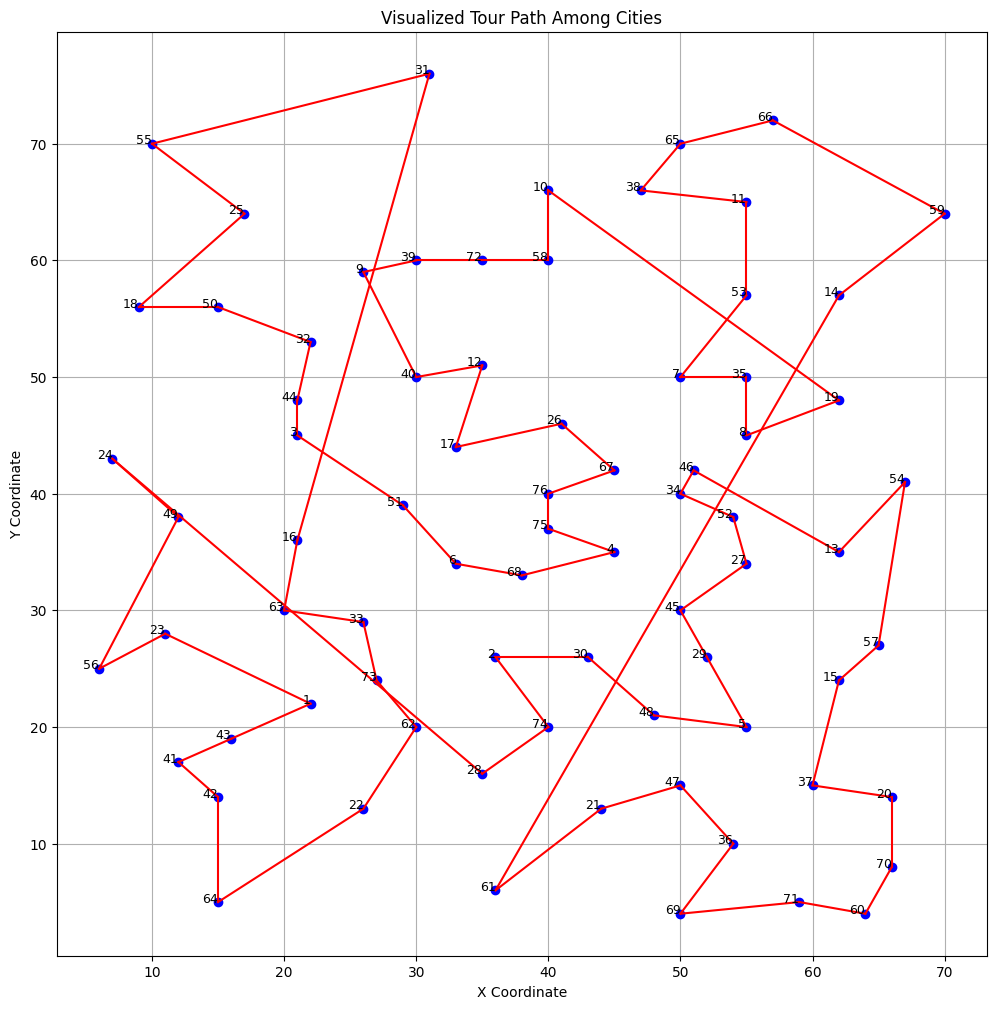

In [8]:
import matplotlib.pyplot as plt

# Combine all cities into one dictionary
all_cities = {**cities1, **cities2, **cities3, **cities4}

# Define the tour across all clusters
tour = [14, 59, 66, 65, 38, 11, 53, 7, 35, 8, 19, 10, 58, 72, 39, 9, 40, 12, 17, 26, 67, 76, 75, 4, 68, 6, 51, 3, 44, 32, 50, 18, 25, 55, 31, 16, 63, 33, 73, 62, 22, 64, 42, 41, 43, 1, 23, 56, 49, 24, 28, 74, 2, 30, 48, 5, 29, 45, 27, 52, 34, 46, 13, 54, 57, 15, 37, 20, 70, 60, 71, 69, 36, 47, 21, 61, 14]
# Plotting the cities and the tour
fig, ax = plt.subplots(figsize=(12, 12))

# Extract coordinates for the tour
tour_coordinates = [all_cities[city] for city in tour]

# Plot each city as a point
for city_index, (x, y) in all_cities.items():
    ax.plot(x, y, 'bo')  # blue dot for each city
    ax.text(x, y, str(city_index), fontsize=9, ha='right')

# Draw lines between cities according to the tour
for i in range(len(tour_coordinates) - 1):
    x0, y0 = tour_coordinates[i]
    x1, y1 = tour_coordinates[i + 1]
    ax.plot([x0, x1], [y0, y1], 'r-')  # red line for the tour path

# Setting labels and grid
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
ax.set_title('Visualized Tour Path Among Cities')
ax.grid(True)

# Show the completed plot
plt.show()